TU Delft internship of Bordeaux ENSEIRB -MATMECA student Anouchka Desmettre 
Dates: June 1st - August 31st, 2024 

Supervision: D. Lahaye (DIAM - EEMCS Faculty - TU Delft)

# Title: Mathematical modelling and numerical simulation of driving buses and vibrations door   

## 4 Two Point Mass System 

### 4.1 Case-study/Description/Motion: 

Consider a model with two interconnected point masses (2-DOF along x-axis). This can represent various scenarios such as a bus and door, two doors, a door separated into two parts, or a door separated into a glass and metal frame. The motion of the system can be described using the displacement of each mass along the x-axis.

### 4.2 Mathematical Model 

#### ODE for Two Mass-Spring-Damper System

Consider a system of two coupled point masses with the following equations of motion:

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) =  F_{external1}(t) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = F_{external2}(t) 
\end{cases}
$

where:

- $ m_1 $ and $ m_2 $ are the masses.
- $\gamma_1$: Damping coefficient associated with $u_1$, $\gamma_2$: Shared damping coefficient affecting both $u_1$ and $u_2$, $\gamma_3$: Damping coefficient associated with $u_2$.
- $k_1$: Spring constant related to $u_1$, $k_2$: Shared spring constant between $u_1$ and $u_2$, $k_3$: Spring constant related to $u_2$.
- $F_{\text{external1}}(t)$: External force acting on $u_1$, $F_{\text{external2}}(t)$: External force acting on $u_2$.

#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u_1(0) = 0 \quad \text{(zero initial position of mass 1)}
$

$
\dot{u}_1(0) = 0 \quad \text{(zero initial velocity of mass 1)}
$

$
u_2(0) = 0 \quad \text{(zero initial position of mass 2)}
$

$
\dot{u}_2(0) = 0 \quad \text{(zero initial velocity of mass 2)}
$

### 4.3 Parameter values

1. **Masses $m_1$ and $m_2$:**  
Between 50 and 100 kg for each mass.

2. **Spring Constants $k_1$ and $k_2$:** 
These are chosen such that $\sqrt{\frac{k_1}{m_1}}$ and $\sqrt{\frac{k_3}{m_2}}$ match the measured resonant frequencies $\omega_{01}$ and $\omega_{02}$, respectively:
   $ k_1 = m_1 \omega_{01}^2 $ and $ k_3 = m_2 \omega_{02}^2 $ (simple harmonic motion).

3. **Damping Coefficients $\gamma_1$, $\gamma_2$, $\gamma_3$:**
Estimation of these coefficients is challenging. Typically determined through experimental measurements or tuning based on observed system behavior.

### 4.4 Impact study 

**Modeling a Two-Mass System with Four Nodes and Three Springs without Damping**

#### Case Description

Consider a system with four nodes (two movable and two static) connected by three springs ($k_1$, $k_2$ and $k_3$). The first and last nodes are fixed, while the middle nodes contain the masses $m_1$ and $m_2$. 

<img src="2masses_3springs.png" alt="2masses_3springs">


#### Equations of Motion
An impulsive force $ F_0 \delta(t - t_0) $ is applied to one of the masses, either $ m_1 $ or $ m_2 $.

$
\begin{cases}
m_1 \frac{d^2 x_1}{dt^2} + k_1 x_1 + k_2 (x_1 - x_2) = F_0 \delta(t - t_0) \\ 
m_2 \frac{d^2 x_2}{dt^2} + k_3 x_2 + k_2 (x_2 - x_1) = 0
\end{cases}
$

These equations describe the dynamic behavior of the two-mass system when an impulsive force $ F_0 \delta(t - t_0) $ is applied to the first mass at time $t_0$.

#### Analytical Solution without damping using Matrix 
1. **Definition of the Connectivity Matrix, the Diagonal Matrix of Spring Constants and the Diagonal Mass Matrix**

The connectivity matrix $ B $ describes the kinematics (geometry of interconnections) between the points and the springs : 
$ 
B = \begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
$

The diagonal matrix $D$ contains the values of the spring constants. This matrix is of size $ 3 \times 3 $ because there are three springs 
$ 
D = \begin{pmatrix} 
k_1 & 0 & 0 \\
0 & k_2 & 0 \\
0 & 0 & k_3
\end{pmatrix} 
$

The diagonal matrix $M$ contains the values of the masses. This matrix is of size $ 2 \times 2 $ because there are two masses 
$ 
M = \begin{pmatrix} 
m_1 & 0 \\
0 & m_2 \\
\end{pmatrix} 
$


2. **Calculation of the Weighted Laplacian Matrix**

The weighted Laplacian matrix $ K $ is obtained by multiplying $ B $, $ D $, and the transpose of $ B $ : $ K = B^\top D B $

We compute:
$ 
K = \begin{pmatrix} 
1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & 0 & -1 \\ 
\end{pmatrix}
\begin{pmatrix} 
k_1 & 0 & 0  \\
0 & k_2 & 0  \\
0 & 0 & k_3 
\end{pmatrix}
\begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
\iff K = \begin{pmatrix} k_1 & -k_1 & 0 & 0 \\ -k_1 & k_1 + k_2 & -k_2 & 0 \\ 0 & -k_2 & k_2 + k_3 & -k_3 \\ 0 & 0 & -k_3 & k_3 \\\end{pmatrix} 
$

3. **Extraction of the Submatrix $ K_0 $**

The submatrix $ K_0 $ is obtained by removing the first and last rows and columns of $ K $, representing the fixed points.

$ K_0 = \begin{pmatrix}
k_1 + k_2 & -k_2 \\
-k_2 & k_2 + k_3
\end{pmatrix} $. Thus, $ K_0 $ only contains the elements corresponding to the mobile node

4. **Writing the System Equation with an Impulsive Force**:
   The equation of motion with an impulsive force $ F_0 \delta(t - t_0) $ applied to $ m_1 $ is given by:

$ 
M \ddot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t) 
$, where $ \vec{F}(t) $ is : $ 
\vec{F}(t) = \begin{pmatrix} 
F_0 \delta(t - t_0) \\
0 
\end{pmatrix}
$

**Modeling a Two-Mass System with Four Nodes and Three Springs with Damping**

#### Case Description

We consider the same system as before, but three dampers $\gamma_1$, $\gamma_2$, and $\gamma_3$ connected along with the springs have been added.

<img src="DAMPING.png" alt="DAMPING">


#### Equations of Motion

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = 0
\end{cases}
$

#### Analytical Solution adding Damping using Matrix

1. **Definition of the Diagonal Damping Coefficient Matrix**

The diagonal matrix $ \Gamma $ contains the values of the damping coefficients.

$ \Gamma = \begin{pmatrix} 
\gamma_1 & 0 & 0 \\
0 & \gamma_2 & 0 \\
0 & 0 & \gamma_3
\end{pmatrix}
$

2. **Calculation of the Weighted Laplacian Matrix for Damping and Extraction of the Submatrix $ C_0 $**


The weighted Laplacian matrix $ C $ is obtained by multiplying $ B $, $ \Gamma $, and the transpose of $ B $.

$ 
C = B^\top \Gamma B \iff  
C = \begin{pmatrix}
\gamma_1 & -\gamma_1 & 0 & 0 \\
-\gamma_1 & \gamma_1 + \gamma_2 & -\gamma_2 & 0 \\
0 & -\gamma_2 & \gamma_2 + \gamma_3 & -\gamma_3 \\
0 & 0 & -\gamma_3 & \gamma_3
\end{pmatrix}
$

The submatrix $ C_0 $ is obtained by removing the first and last rows and columns of $ C $, it only contains the elements corresponding to the mobile node.

$ 
C_0 = \begin{pmatrix} 
\gamma_1 + \gamma_2 & -\gamma_2 \\
-\gamma_2 & \gamma_2 + \gamma_3
\end{pmatrix} 
$

3. **Writing the System Equation with Damping and finding the Solution**

The equation of motion with damping is given by : $ M \ddot{\vec{u}}(t) + C_0 \dot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t)$

- Rewrite the second-order differential equations as a first-order system by defining the state vector state vector $z$ to include both the displacements ($u$) and the velocities ($\dot{u}$)

So we create : $z = \begin{pmatrix} u_1 \\ u_2 \\ \dot{u}_1 \\ \dot{u}_2 \end{pmatrix}$, the state-space representation can be written as : $ \dot{z} = A z + B \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 +k_3}{m_2} & \frac{\gamma_2}{m_2} & -\frac{\gamma_2 +\gamma_3}{m_2} \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{1}{m_1} \\ 0 \end{pmatrix} F_0 \delta(t - t_0) \iff
\dot{z} = \begin{pmatrix} 0 & I \\ - M^{-1}K_0 & - M^{-1}C_0 \end{pmatrix} z + \begin{pmatrix} 0 \\ M^{-1}F \end{pmatrix} $


- Find the Eigenvalues $\lambda$ and the Eigenvectors $V$ of the System Matrix

We calculate : $ \text{det}(A - \lambda I) = 0  \iff \begin{vmatrix}
-\lambda & 0 & 1 & 0 \\ 0 & -\lambda & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{vmatrix} = 0 $ 

We expand along the first row : $-\lambda \begin{vmatrix} -\lambda & 0 & 1 \\0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{vmatrix} + \begin{vmatrix} 0 & -\lambda & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2}& -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{vmatrix} $

We expand again along the first row for each matrix :  $-\lambda^{2} \begin{vmatrix} -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{vmatrix} - \lambda \begin{vmatrix}0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} \\ \frac{k_2}{m_2} & \frac{\gamma_2}{m_2} & \end{vmatrix} + \lambda \begin{vmatrix} -\frac{k_1+k_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{vmatrix} + \begin{vmatrix} -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2}& \end{vmatrix}  $


In [22]:
using SymPy

# Définir les variables symboliques
@syms λ m1 m2 k1 k2 k3 γ1 γ2 γ3

# Définir la matrice A
A = [
    0     0     1     0;
    0     0     0     1;
    -((k1 + k2) / m1)   (k2 / m1)   -((γ1 + γ2) / m1)  (γ2 / m1);
    (k2 / m2)   -((k2 + k3) / m2)   (γ2 / m2)   -((γ2 + γ3) / m2)
]

# Construire la matrice A - λI
n = size(A, 1)  # Taille de la matrice A
I_matrix  = [ 
    1 0 0 0;
    0 1 0 0; 
    0 0 1 0;
    0 0 0 1
]
A_λ = A - λ * I_matrix

# Calculer le déterminant
det_A_λ = SymPy.det(A_λ)

# Simplifier le déterminant
det_A_λ_simplified = simplify(det_A_λ)

# Afficher le polynôme caractéristique
println("Le polynôme caractéristique est : ", det_A_λ_simplified)


Le polynôme caractéristique est : (k1*k2 + k1*k3 + k1*m2*λ^2 + k1*γ2*λ + k1*γ3*λ + k2*k3 + k2*m1*λ^2 + k2*m2*λ^2 + k2*γ1*λ + k2*γ3*λ + k3*m1*λ^2 + k3*γ1*λ + k3*γ2*λ + m1*m2*λ^4 + m1*γ2*λ^3 + m1*γ3*λ^3 + m2*γ1*λ^3 + m2*γ2*λ^3 + γ1*γ2*λ^2 + γ1*γ3*λ^2 + γ2*γ3*λ^2)/(m1*m2)


In [23]:
using SymPy

# Définir les symboles avec @syms
@syms λ k1 k2 m1 m2 γ1 γ2 γ3

# Définir le polynôme caractéristique
polynome =  (k1*k2 + k1*k3 + k1*m2*λ^2 + k1*γ2*λ + k1*γ3*λ + k2*k3 + k2*m1*λ^2 + k2*m2*λ^2 + k2*γ1*λ + k2*γ3*λ + k3*m1*λ^2 + k3*γ1*λ + k3*γ2*λ + m1*m2*λ^4 + m1*γ2*λ^3 + m1*γ3*λ^3 + m2*γ1*λ^3 + m2*γ2*λ^3 + γ1*γ2*λ^2 + γ1*γ3*λ^2 + γ2*γ3*λ^2)/(m1*m2)

# Résoudre le polynôme
solutions = solve(polynome, λ)

# Afficher les solutions
println("Les solutions du polynôme caractéristique sont : ", solutions)


Les solutions du polynôme caractéristique sont : Sym{PyCall.PyObject}[Piecewise((-sqrt(-2*(-((k1*m2 + k2*m1 + k2*m2 + k3*m1 + γ1*γ2 + γ1*γ3 + γ2*γ3)/(m1*m2) - 3*(m1*γ2 + m1*γ3 + m2*γ1 + m2*γ2)^2/(8*m1^2*m2^2))^3/108 + ((k1*m2 + k2*m1 + k2*m2 + k3*m1 + γ1*γ2 + γ1*γ3 + γ2*γ3)/(m1*m2) - 3*(m1*γ2 + m1*γ3 + m2*γ1 + m2*γ2)^2/(8*m1^2*m2^2))*(k1*k2/(m1*m2) + k1*k3/(m1*m2) - 3*k1*γ2^2/(16*m1*m2^2) - 3*k1*γ2*γ3/(8*m1*m2^2) - 3*k1*γ3^2/(16*m1*m2^2) - k1*γ1*γ2/(8*m1^2*m2) - k1*γ1*γ3/(8*m1^2*m2) - k1*γ2^2/(8*m1^2*m2) - k1*γ2*γ3/(8*m1^2*m2) + k1*γ1^2/(16*m1^3) + k1*γ1*γ2/(8*m1^3) + k1*γ2^2/(16*m1^3) + k2*k3/(m1*m2) + k2*γ2^2/(16*m2^3) + k2*γ2*γ3/(8*m2^3) + k2*γ3^2/(16*m2^3) - k2*γ1*γ2/(8*m1*m2^2) - k2*γ1*γ3/(8*m1*m2^2) + 3*k2*γ2^2/(16*m1*m2^2) - 3*k2*γ3^2/(16*m1*m2^2) - 3*k2*γ1^2/(16*m1^2*m2) - k2*γ1*γ3/(8*m1^2*m2) + 3*k2*γ2^2/(16*m1^2*m2) - k2*γ2*γ3/(8*m1^2*m2) + k2*γ1^2/(16*m1^3) + k2*γ1*γ2/(8*m1^3) + k2*γ2^2/(16*m1^3) + k3*γ2^2/(16*m2^3) + k3*γ2*γ3/(8*m2^3) + k3*γ3^2/(16*m2^3) - k3*γ1*γ2/(8*m1*m2

We calculate the determinant:

$ \text{det}(A - \lambda I) = \begin{vmatrix}
-\lambda & 0 & 1 & 0 \\
0 & -\lambda & 0 & 1 \\
-\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\
\frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2}
\end{vmatrix} $

Expanding along the first row:

$ \text{det}(A - \lambda I) = (-\lambda) \begin{vmatrix}
-\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\
\frac{k_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2}
\end{vmatrix} - 0 + \begin{vmatrix}
0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} \\
\frac{k_2}{m_2} & \frac{\gamma_2}{m_2}
\end{vmatrix} $

Calculating the determinants:

$ \text{det}(A - \lambda I) = -\lambda \left[ (-\lambda - \frac{\gamma_1 + \gamma_2}{m_1}) \left( -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \right) - \frac{\gamma_2}{m_1} \cdot \frac{k_2}{m_2} \right] + \left[ 0 \cdot \left( -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} \right) - \frac{k_2}{m_2} \cdot \frac{\gamma_2}{m_2} \right] $

Simplifying further:

$ \text{det}(A - \lambda I) = \lambda^2 \left( \lambda + \frac{\gamma_1 + \gamma_2}{m_1} \right) \left( \lambda + \frac{\gamma_2 + \gamma_3}{m_2} \right) - \frac{\gamma_2 k_2}{m_1 m_2} $

Therefore, the characteristic polynomial in terms of \( \lambda \) is:

$ \lambda^4 + \left( \frac{\gamma_1 + \gamma_2}{m_1} + \frac{\gamma_2 + \gamma_3}{m_2} \right) \lambda^3 + \left( \frac{\gamma_1 + \gamma_2}{m_1} \cdot \frac{\gamma_2 + \gamma_3}{m_2} + \frac{k_1 + k_2}{m_1} + \frac{k_2 + k_3}{m_2} \right) \lambda^2 + \left( \frac{\gamma_1 + \gamma_2}{m_1} \cdot \frac{k_2 + k_3}{m_2} - \frac{\gamma_2 k_2}{m_1 m_2} \right) \lambda - \frac{\gamma_2 k_2}{m_1 m_2} $




In [24]:
using SymPy

# Définir les symboles avec @syms
@syms λ k1 k2 m1 m2 γ1 γ2 γ3

# Définir le polynôme caractéristique
polynome =  λ^4 + ((γ1 + γ2) / m1 + (γ2 + γ3) / m2) * λ^3 + ((γ1 + γ2) / m1 * (γ2 + γ3) / m2 + (k1 + k2) / m1 + (k2 + γ3) / m2) * λ^2 + ((γ1 + γ2) / m1 * (k2 + γ3) / m2 - γ2 * k2 / (m1 * m2)) * λ - γ2 * k2 / (m1 * m2)

# Résoudre le polynôme
solutions = solve(polynome, λ)

# Afficher les solutions
println("Les solutions du polynôme caractéristique sont : ", solutions)


Les solutions du polynôme caractéristique sont : Sym{PyCall.PyObject}[Piecewise((-sqrt(-2*(-((k1*m2 + k2*m1 + k2*m2 + m1*γ3 + γ1*γ2 + γ1*γ3 + γ2^2 + γ2*γ3)/(m1*m2) - 3*(m1*γ2 + m1*γ3 + m2*γ1 + m2*γ2)^2/(8*m1^2*m2^2))^3/108 + ((k1*m2 + k2*m1 + k2*m2 + m1*γ3 + γ1*γ2 + γ1*γ3 + γ2^2 + γ2*γ3)/(m1*m2) - 3*(m1*γ2 + m1*γ3 + m2*γ1 + m2*γ2)^2/(8*m1^2*m2^2))*(k1*γ2^2/(16*m1*m2^2) + k1*γ2*γ3/(8*m1*m2^2) + k1*γ3^2/(16*m1*m2^2) + k1*γ1*γ2/(8*m1^2*m2) + k1*γ1*γ3/(8*m1^2*m2) + k1*γ2^2/(8*m1^2*m2) + k1*γ2*γ3/(8*m1^2*m2) + k1*γ1^2/(16*m1^3) + k1*γ1*γ2/(8*m1^3) + k1*γ2^2/(16*m1^3) + k2*γ2^2/(16*m2^3) + k2*γ2*γ3/(8*m2^3) + k2*γ3^2/(16*m2^3) - k2*γ2/(m1*m2) - k2*γ1*γ2/(8*m1*m2^2) - k2*γ1*γ3/(8*m1*m2^2) + 3*k2*γ2^2/(16*m1*m2^2) + k2*γ2*γ3/(4*m1*m2^2) + k2*γ3^2/(16*m1*m2^2) - 3*k2*γ1^2/(16*m1^2*m2) + k2*γ1*γ3/(8*m1^2*m2) + 3*k2*γ2^2/(16*m1^2*m2) + k2*γ2*γ3/(8*m1^2*m2) + k2*γ1^2/(16*m1^3) + k2*γ1*γ2/(8*m1^3) + k2*γ2^2/(16*m1^3) + γ2^2*γ3/(16*m2^3) + γ2*γ3^2/(8*m2^3) + γ3^3/(16*m2^3) - 3*γ2^4/(256*m2^4) - 3*γ2

#### Analytical Solution Using : https://mega.nz/file/qZljDZAD#xkkAFuHa3g6_LbowJvlTOZP37fdzgC2iV2VIXSp1TyY 

The equation of motion with damping is given by : $ M \ddot{\vec{u}}(t) + C_0 \dot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t)$

The harmonic solution for the system can be expressed in the form of a column vector as follows : $ \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} = \begin{pmatrix} a_1 \\ a_2 \end{pmatrix} e^{i \omega t} $. This assumes the system's response is a superposition of oscillatory modes at frequency $ \omega $.

Substituting these into the motion equation, we get:
$
\begin{pmatrix} m_1 & 0 \\ 0 & m_2 \end{pmatrix} (-\omega^2 \vec{u}(t)) + \begin{pmatrix} \gamma_1 + \gamma_2 & -\gamma_2 \\ -\gamma_2 & \gamma_2 + \gamma_3 \end{pmatrix} (i \omega \vec{u}(t)) + \begin{pmatrix} k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3 \end{pmatrix} \vec{u}(t) = \vec{F}(t)
\iff 
\begin{pmatrix}
-m_1 \omega^2 + i \omega (\gamma_1 + \gamma_2) + k_1 + k_2 & -i \omega \gamma_2 - k_2 \\
-i \omega \gamma_2 - k_2 & -m_2 \omega^2 + i \omega (\gamma_2 + \gamma_3) + k_2 + k_3
\end{pmatrix} \begin{pmatrix} a_1 \\ a_2 \end{pmatrix} e^{i \omega t} = \vec{F}(t)
$




#### Analytical Solution Using Laplace Transform

**Laplace Transform**

Applying the Laplace transform to each term in the equations, given the zero initial conditions, we obtain:

$m_1 s^2 U_1(s) + \gamma_1 s U_1(s) + \gamma_2 s (U_1(s) - U_2(s)) + k_1 U_1(s) + k_2 (U_1(s) - U_2(s)) = F_0 e^{-st_0}$

$m_2 s^2 U_2(s) + \gamma_3 s U_2(s) + \gamma_2 s (U_2(s) - U_1(s)) + k_3 U_2(s) + k_2 (U_2(s) - U_1(s)) = 0
$

$\iff \begin{pmatrix} m_1 s^2 + \gamma_1 s + (k_1 + k_2) & -(\gamma_2 s + k_2) \\
-(\gamma_2 s + k_2) & m_2 s^2 + \gamma_3 s + (k_3 + k_2)
\end{pmatrix} $ 
$
\begin{pmatrix}
U_1(s) \\
U_2(s)
\end{pmatrix}$ $=
\begin{pmatrix}
 F_0 e^{-st_0} \\
0
\end{pmatrix}
 \iff A(s) U(s) = F(s) $

**Solve Linear System**

The determinant of $A$ Is : $ \det(A) = (m_1 s^2 + \gamma_1 s + k_1 + k_2)(m_2 s^2 + \gamma_3 s + k_3 + k_2) - (\gamma_2 s + k_2)^2 $

It must be non-zero to ensure that the matrix is invertible and a unique solution exists for the system's response in the Laplace domain. 
The following conditions should generally be met:
- The masses $m_1$ and $m_2$ should be strictly positive, ensuring positive contributions from the quadratic terms in $s$ related to inertia.
- The spring constants and damping coefficients should be positive or at least non-negative, which contributes positively to the system’s stiffness and damping, thereby increasing overall system stability.

So for $\det(A) \neq 0$, we get:

$
\begin{pmatrix}
U_1(s) \\
U_2(s)
\end{pmatrix} = A^{-1} \begin{pmatrix}
F_0 e^{-s t_0} \\ 0 \end{pmatrix} 
= \frac{1}{\det(A)} \begin{pmatrix} 
m_2 s^2 + \gamma_3 s + k_3 + k_2 & \gamma_2 s + k_2 \\
\gamma_2 s + k_2 & m_1 s^2 + \gamma_1 s + k_1 + k_2
\end{pmatrix}  \begin{pmatrix}
F_0 e^{-s t_0} \\ 0 \end{pmatrix}
= \frac{1}{\det(A)} \begin{pmatrix}
(m_2 s^2 + \gamma_3 s + k_3 + k_2) F_0 e^{-s t_0} \\
(\gamma_2 s + k_2) F_0 e^{-s t_0}
\end{pmatrix}
$

This results in:

$
U_1(s) = \frac{(m_2 s^2 + \gamma_3 s + k_3 + k_2) F_0 e^{-s t_0}}{\det(A)}
$

$
U_2(s) = \frac{(\gamma_2 s + k_2) F_0 e^{-s t_0}}{\det(A)}
$

We aim to solve the system of differential equations representing a two-mass system with damping and springs, subjected to an external impulsive force. The steps include:

1. Define the characteristic polynomial $det A$ from the system's differential equations.
2. Find the roots $p_i$of the polynomial $det A$.
3. Use the roots to decompose the Laplace transform $U_1(s)$ into partial fractions.
4. Perform the inverse Laplace transform to obtain $u_1(t)$.

In [25]:
using SymPy

# Define the symbolic variables
s, m1, m2, γ1, γ2, γ3, k1, k2, k3 = symbols("s m1 m2 γ1 γ2 γ3 k1 k2 k3")

# Define the polynomial D(s)
D_s = (m1 * m2 * s^4 + (γ1 * m2 + m1 * γ3) * s^3 +
       (m1 * k3 + m1 * k2 + γ1 * γ3 + k1 * m2 + k2 * m2 - γ2^2) * s^2 +
       (γ1 * k3 + γ1 * k2 + γ3 * k1 + γ3 * k2 - 2 * γ2 * k2) * s +
       (k1 * k3 + k1 * k2 + k2 * k3))

# Find the roots of the polynomial
roots = solve(D_s, s)
roots


4-element Vector{Sym{PyCall.PyObject}}:
 Piecewise((-sqrt(-2*(-((k1*m2 + k2*m1 + k2*m2 + k3*m1 + γ1*γ3 - γ2^2)/(m1*m2) - 3*(m1*γ3 + m2*γ1)^2/(8*m1^2*m2^2))^3/108 + ((k1*m2 + k2*m1 + k2*m2 + k3*m1 + γ1*γ3 - γ2^2)/(m1*m2) - 3*(m1*γ3 + m2*γ1)^2/(8*m1^2*m2^2))*(k1*k2/(m1*m2) + k1*k3/(m1*m2) - 3*k1*γ3^2/(16*m1*m2^2) - k1*γ1*γ3/(8*m1^2*m2) + k1*γ1^2/(16*m1^3) + k2*k3/(m1*m2) + k2*γ3^2/(16*m2^3) - k2*γ1*γ3/(8*m1*m2^2) + k2*γ2*γ3/(2*m1*m2^2) - 3*k2*γ3^2/(16*m1*m2^2) - 3*k2*γ1^2/(16*m1^2*m2) + k2*γ1*γ2/(2*m1^2*m2) - k2*γ1*γ3/(8*m1^2*m2) + k2*γ1^2/(16*m1^3) + k3*γ3^2/(16*m2^3) - k3*γ1*γ3/(8*m1*m2^2) - 3*k3*γ1^2/(16*m1^2*m2) - 3*γ3^4/(256*m2^4) + γ1*γ3^3/(64*m1*m2^3) - γ2^2*γ3^2/(16*m1*m2^3) + 7*γ1^2*γ3^2/(128*m1^2*m2^2) - γ1*γ2^2*γ3/(8*m1^2*m2^2) + γ1^3*γ3/(64*m1^3*m2) - γ1^2*γ2^2/(16*m1^3*m2) - 3*γ1^4/(256*m1^4))/3 - (k1*γ3/(2*m1*m2) - k1*γ1/(2*m1^2) - k2*γ3/(2*m2^2) + k2*γ1/(2*m1*m2) - 2*k2*γ2/(m1*m2) + k2*γ3/(2*m1*m2) - k2*γ1/(2*m1^2) - k3*γ3/(2*m2^2) + k3*γ1/(2*m1*m2) + γ3^3/(8*m2^3) - γ1*γ3

#### Frequency Analysis

1. **Two Resonant Frequencies**:

   The system will have two resonant frequencies, corresponding to the eigenvalues found in the matrix diagonalization step.

2. **Two Vibrational Eigenmodes**:

   The system will have two vibrational eigenmodes, which can be visualized as the specific patterns of motion at each resonant frequency. (see comsol.com webpage)

#### Numerical Study

1. **Solve Numerically Using Time Integration**:

   Use numerical methods to solve the equations of motion over the specified time span.

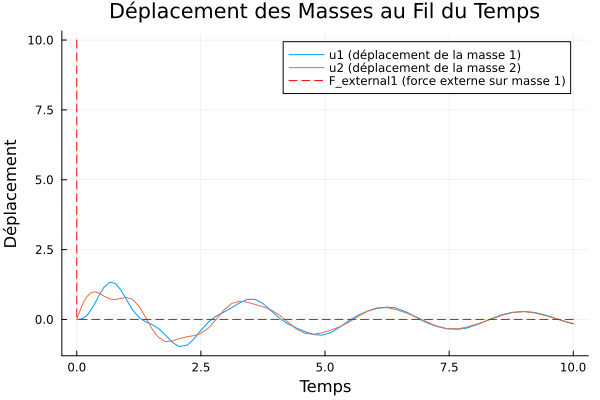

In [84]:
using DifferentialEquations
using Plots

# Définition des paramètres
m1 = 75.0  # masse 1 (entre 50 et 100 kg)
m2 = 85.0  # masse 2 (entre 50 et 100 kg)
ω01 = 2.0  # fréquence de résonance pour la masse 1
ω02 = 2.5  # fréquence de résonance pour la masse 2

k1 = m1 * ω01^2  # constante du ressort k1
k3 = m2 * ω02^2  # constante du ressort k3
k2 = 1500.0      # constante du ressort k2 (choisie pour créer un couplage entre les masses)

γ1 = 20.0  # coefficient d'amortissement γ1
γ2 = 25.0  # coefficient d'amortissement γ2
γ3 = 30.0  # coefficient d'amortissement γ3

# Définition de la force externe impulsive (Dirac) sur la masse 1 à t = 0.5
function F_external1(t)
    if t ≈ 0.0
        return 10.0
    else
        return 0.0
    end
end

# Fonction pour la force externe sur la masse 2 (aucune force externe ici)
F_external2(t) = 0.0

# Définition du système d'ODE du premier ordre
function system!(du, u, p, t)
    x1, v1, x2, v2 = u  # positions et vitesses
    
    du[1] = v1
    du[2] = (F_external1(t) - γ1*v1 - γ2*(v1 - v2) - k1*x1 - k2*(x1 - x2)) / m1
    du[3] = v2
    du[4] = (F_external2(t) - γ3*v2 - γ2*(v2 - v1) - k3*x2 - k2*(x2 - x1)) / m2
end

# Conditions initiales : positions et vitesses initiales nulles
u0 = [0.0, 0.0, 0.0, 5.0]

# Intervalle de temps pour la simulation
tspan = (0.0, 10.0)

# Définition du problème d'ODE du premier ordre
prob = ODEProblem(system!, u0, tspan)

# Résolution du problème avec la méthode Tsit5()
sol = solve(prob, Tsit5())

# Tracé des résultats des déplacements
plot(sol.t, sol[1,:], label="u1 (déplacement de la masse 1)", xlabel="Temps", ylabel="Déplacement", title="Déplacement des Masses au Fil du Temps")
plot!(sol.t, sol[3,:], label="u2 (déplacement de la masse 2)")
plot!(sol.t, t -> F_external1(t), label="F_external1 (force externe sur masse 1)", linestyle=:dash, color=:red)

2. **Compare Analytical and Numerical Solutions**:

   Compare the time-domain solutions $ u_1(t) $ and $ u_2(t) $ obtained analytically and numerically.

3. **Study stiffness**:

    definiton stifness donc on va étudider le systèem pour différentes valeurs de $\omega$ pour cela on va utiliser des masses yrès différentes 

4. **Frequency spectra**:

   Plot the frequency spectra of both masses over time to visualize the response of the system.

2. **Compare Analytical and Numerical Solutions**:

   Compare the time-domain solutions $ u_1(t) $ and $ u_2(t) $ obtained analytically and numerically.

3. **Study stiffness**:

    definiton stifness donc on va étudider le systèem pour différentes valeurs de $\omega$ pour cela on va utiliser des masses yrès différentes 

4. **Frequency spectra**:

   Plot the frequency spectra of both masses over time to visualize the response of the system.

### 4.5 Vibration study 


Impose forced vibration with driving frequency \omega_d on one of two point masses. Proceed as before.  Investigate frequency response, in particular \omega_d close to one of both resonant frequencies. 



References: 

https://github.com/ziolai/ventura-modeling/blob/main/jupyter-notebooks/point-mass-systems.ipynb 



## 5/ Stationary Thin Beam Equation - Biharmonic Equation - Deflection 


gti hub Dr. Lahaye : https://github.com/ziolai/finite_element_electrical_engineering/tree/main 

Find analytical reference solution on wiki pages. Recover analytical reference using shooting method implemented in  DifferentialEquations.jl (see internship Yann Oukrid). 



Solve bi-harmonic equation using finite difference method on uniform spatial mesh. 



(In case that Anouchka finds this interesting and fun). Solve bi-harmonic equation using finite element method on non-uniform spatial mesh. 



References: 

implementation in part available; 



## 6/ Thin Beam Equation Modal Analysis 



Find analytical expressions for the eigenmodes. Recover analytical expression by computing eigenvalues and eigenmodes of the discrete bi-harmonic equation. 



The eigenvectors of the matrix A are numerical approximation to the shape modes or modal modes of the structure. These modes are explained on the wiki page https://en.wikipedia.org/wiki/Modal_analysis_using_FEM . This webpage says that "The physical interpretation of the eigenvalues and eigenvectors which come from solving the system are that they represent the frequencies and corresponding mode shapes. Sometimes, the only desired modes are the lowest frequencies because they can be the most prominent modes at which the object will vibrate, dominating all the higher frequency modes.”



## 7/ Thin Beam Equation Transient Analysis 



Find analytical reference solution (using e.g,. separation of variables) in literature. 



Recover analytical reference solution using finite difference in space and time-integration iin time domain. 



(In case that Anouchka finds this interesting and fun): replace uniform mesh finite differences in space by non-uniform mesh finite elements in space. 



References: 

\url{https://en.wikipedia.org/wiki/Euler\%E2\%80\%93Bernoulli_beam_theory}



## 8/ Thin Beam Equation Transient Analysis with Hinges as Boundary conditions 



Find reference solutions (see e.g. papers by Demeio - Lenci - 2019) (need to give Anouchka access to paper). 



Reproduce reference results numerically using either finite differences on uniform mesh first and possibly using finite elements on non-uniform mesh later. 

voir page 11 : file:///home/anouchka/T%C3%A9l%C3%A9chargements/student-report-partB_2023.pdf étendre à 2D

## 9/ Extend to Two Dimensional Kirchoff - Love Thin Plate Equations 

[In case time, enthousiasm and excitement remains] 

References

\url{https://en.wikipedia.org/wiki/Kirchhoff\%E2\%80\%93Love\_plate\_theory}



## 10/ Conclusions 



What we learned in the project. 
